In [1]:
import xarray as xr
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import pandas as pd
import dask
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import cartopy as cy
from functions import trend
import os as os
#import pymannkendall as mk
%matplotlib inline

In [2]:
! pip install pymannkendall
import pymannkendall as mk

In [3]:
'''
urls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/co2/gn/v20191108/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emibc/gn/v20191108/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emibvoc/gn/v20191108/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emidms/gn/v20191108/emidms_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emidust/gn/v20191108/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emiisop/gn/v20191108/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emioa/gn/v20191108/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emiso2/gn/v20191108/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emiso4/gn/v20191108/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emiss/gn/v20191108/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emivoc/gn/v20191108/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/so2/gn/v20191108/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/prc/gn/v20191108/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/pr/gn/v20191108/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/Amon/ts/gn/v20191108/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-LM/abrupt-4xCO2/r1i1p1f1/AERmon/emidms/gn/v20210118/emidms_AERmon_NorESM2-LM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/ccn/gn/v20191108/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/cdnc/gn/v20191108/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', 
 #'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/dms/gn/v20191108/dms_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012'
       ]

# wget all files in the list
for url in urls:
    os.system('wget ' + url)
'''

"\nurls = ['http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/co2/gn/v20191108/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emibc/gn/v20191108/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emibvoc/gn/v20191108/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emidms/gn/v20191108/emidms_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc', \n 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/abrupt-4xCO2/r1i1p1f1/AERmon/emidust/gn/v20191

In [4]:
#url = 'http://noresg.nird.sigma2.no/thredds/fileServer/esg_dataroot/cmor/CMIP6/CMIP/NCC/NorESM2-MM/piControl/r1i1p1f1/AERmon/so2/gn/v20191108/emiisop_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc'
#os.system('wget '+ url)

In [257]:
# Read in multiple piControl files:

list_of_files10_piControl = [
    '../../Data/ccn_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/co2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    #'../../Data/dms_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    #'../../Data/emidms_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/pr_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/prc_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/ts_Amon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/so2_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_piControl_r1i1p1f1_gn_120001-120912.nc'
]


# missing so2, emiisop, emivoc
ds_piControl10 = xr.open_mfdataset(list_of_files10_piControl, combine='by_coords', compat='override', use_cftime=True)#concat_dim='time',combine='by_coords')
ds_piControl10


<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1200-01-16 12:00:00 ... 1209-12-16 12:00:00
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables: (12/26)
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    p0         float64 ...
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...         ...
    emiso4     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiss      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc        (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ts         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piContr...
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               cdnc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/9514c407-05be-44d4-9aee-cdf51d923312

In [258]:

ds_piControl20 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_121001-121912.nc', use_cftime=True)#concat_dim='time',combine='by_coords')
ds_piControl30 = xr.open_mfdataset('../../Data/NorESM2-MM_piControl_r1i1p1f1_gn_122001-122912.nc', use_cftime=True)#concat_dim='time',combine='by_coords')


In [259]:
list_of_files20 = [
    #'../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-001012.nc',
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    #'../../Tjaernoe2022-group7/ingrblu/emidms_AERmon_NorESM2-LM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc']

ds_4xco2_20 = xr.open_mfdataset(list_of_files20, combine='by_coords', compat='override', use_cftime=True)#concat_dim='time',combine='by_coords')
ds_4xco2_20

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 0011-01-16 12:00:00 ... 0020-12-16 12:00:00
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables: (12/26)
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    p0         float64 ...
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...         ...
    emiso4     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiss      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc        (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ts         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               cdnc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/e6a80728-03d9-4a24-87b1-67a45044fdbd

In [260]:
list_of_files30 = [
    #'../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-001012.nc',
    '../../Data/ccn_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/pr_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emibvoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    #'../../Tjaernoe2022-group7/ingrblu/emidms_AERmon_NorESM2-LM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc',
    '../../Data/emidust_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiisop_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emioa_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiso4_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emiss_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/emivoc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/prc_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc',
    '../../Data/ts_Amon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc']

ds_4xco2_30 = xr.open_mfdataset(list_of_files30, combine='by_coords', compat='override', use_cftime=True)#concat_dim='time',combine='by_coords')
ds_4xco2_30

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 0021-01-16 12:00:00 ... 0030-12-16 12:00:00
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: bnds
Data variables: (12/26)
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    p0         float64 ...
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...         ...
    emiso4     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiss      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc        (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ts         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               cdnc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/02801f3b-389d-47a2-9e75-e10706170c71

In [261]:
ds_piControl10 = ds_piControl10.assign_coords(lon=(((ds_piControl10.lon + 180) % 360) - 180)).sortby('lon')

ds_piControl10

/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/notebook/lib/python3.9/site-packages/xarray/core/indexing.py:1374: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/srv/conda/envs/note

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time       (time) object 1200-01-16 12:00:00 ... 1209-12-16 12:00:00
  * lev        (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon        (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Dimensions without coordinates: bnds
Data variables: (12/26)
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lev_bnds   (lev, bnds) float64 dask.array<chunksize=(32, 2), meta=np.ndarray>
    p0         float64 ...
    a          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    b          (lev) float64 dask.array<chunksize=(32,), meta=np.ndarray>
    ps         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...         ...
    emiso4     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiss      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc     (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc        (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ts         (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piContr...
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               cdnc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/9514c407-05be-44d4-9aee-cdf51d923312

In [161]:
ds_piControl20

<xarray.Dataset>
Dimensions:  (time: 120, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 1210-01-16 12:00:00 ... 1219-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Data variables: (12/16)
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emidust  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...       ...
    emiss    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    ts       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>

In [262]:
ds_4xco2_10 = xr.open_mfdataset('../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-001012.nc', use_cftime=True)#concat_dim='time',combine='by_coords')

In [126]:

time20 = ds_4xco2_20.time.values
time30 = ds_4xco2_30.time.values

#time20_piControl = ds_piControl20.time.values
##time30_piControl = ds_piControl_30.time.values



In [263]:
def convert(ds, list_of_files, time):

    levels = ds_4xco2_10.lev.values
    lat = ds_4xco2_10.lat.values
    lon = ds_4xco2_10.lon.values

        

    ds_all = xr.Dataset({'time': time, 'lev': levels, 'lat': lat,'lon': lon})
    for path in list_of_files:
            ds = xr.open_dataset(path)
            for var in ds.data_vars:
                    a = str(var)
            try:
                    ds_all[a] = (['time', 'lat', 'lon'], ds[a].values)
            except:
                    print(path)
                    ds_all[a] = (['time', 'lev', 'lat', 'lon'], ds[a].values)

    ds_all = ds_all.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby('lon')
    return ds_all



In [128]:
#trenger ikke denne
def convert_piControl(ds, time):

    levels = ds_piControl_10.lev.values
    lat = ds_piControl_10.lat.values
    lon = ds_piControl_10.lon.values
        

    ds_all = xr.Dataset({'time': time, 'lev': levels, 'lat': lat,'lon': lon})
    
    for var in ds.data_vars:
        print(var)
        a = str(var)
    try:
        ds_all[a] = (['time', 'lat', 'lon'], ds[a].values)
                    
    except:
        print(path)
        ds_all[a] = (['time', 'lev', 'lat', 'lon'], ds[a].values)

    ds_all = ds_all.assign_coords(lon=(((ds.lon + 180) % 360) - 180)).sortby('lon')
    return ds_all

In [264]:
ds_20 = convert(ds_4xco2_20, list_of_files20, time20)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_001101-002012.nc


In [265]:
ds_30 = convert(ds_4xco2_30, list_of_files30, time30)

../../Data/cdnc_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/co2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc
../../Data/so2_AERmon_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_gn_002101-003012.nc


In [131]:
#ds_20_piControl = convert_piControl(ds_piControl_20, time20_piControl)
#ds_20_piControl

In [132]:
ds_piControl20

<xarray.Dataset>
Dimensions:  (time: 120, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 1210-01-16 12:00:00 ... 1219-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Data variables: (12/18)
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    dms      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...       ...
    emiss    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    ts       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>

In [133]:
ds_20.data_vars

Data variables:
    ccn      (time, lat, lon) float32 nan nan nan ... 1.248e+07 1.248e+07
    pr       (time, lat, lon) float32 4.247e-07 4.247e-07 ... 3.141e-06
    cdnc     (time, lev, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    co2      (time, lev, lat, lon) float32 0.000429 0.000429 ... 0.000429
    emibc    (time, lat, lon) float32 0.0 0.0 0.0 ... 3.761e-17 3.761e-17
    emibvoc  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    emidust  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    emiisop  (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    emioa    (time, lat, lon) float32 0.0 0.0 0.0 ... 5.338e-14 5.313e-14
    emiso2   (time, lat, lon) float32 0.0 0.0 0.0 ... 6.968e-16 6.968e-16
    emiso4   (time, lat, lon) float32 0.0 0.0 0.0 ... 2.735e-17 2.735e-17
    emiss    (time, lat, lon) float32 0.0 0.0 0.0 ... 1.466e-12 1.459e-12
    emivoc   (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
   

In [266]:
    
    
var_list = ['pr', 'ccn', 'cdnc', 'co2', 'emibc', 'emibvoc', 'emidust', 'emiisop', 'emioa', 'emiso2', 'emiso4', 'emiss', 'emivoc', 'prc', 'so2', 'ts']
#var_list = ds_20.data_vars

ds_all = xr.concat([ds_4xco2_10[var_list], ds_20[var_list], ds_30[var_list]], dim="time")


In [270]:
ds_all_piControl = xr.concat([ds_piControl10[var_list], ds_piControl20[var_list], ds_piControl30[var_list]], dim='time')



In [137]:
#ds_4xco2_10.to_netcdf('../../Data/all_NorESM2-MM_abrupt-4xCO2_r1i1p1f1_000101-002012.nc').append(ds_4xco2_20)

In [149]:
ds_piControl10_test.data_vars

Data variables:
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emidust  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiisop  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emioa    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiso2   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiso4   (time, lat, lo

In [150]:
ds_piControl20.data_vars

Data variables:
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    dms      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emidms   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emidust  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiisop  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emioa    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiso2   (time, lat, lo

In [268]:
variables = ["time_bnds", "lev_bnds", "p0", "a", "b", "ps", "a_bnds", "b_bnds", "lat_bnds", "lon_bnds"]
ds_piControl10 = ds_piControl10.drop_vars(variables)
ds_piControl10

<xarray.Dataset>
Dimensions:  (time: 120, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 1200-01-16 12:00:00 ... 1209-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Data variables: (12/16)
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...       ...
    emiso4   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emiss    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ts       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1200-01-01 of piContr...
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     438000.0
    ...                        ...
    title:                     NorESM2-MM output prepared for CMIP6
    variable_id:               cdnc
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/9514c407-05be-44d4-9aee-cdf51d923312

In [269]:
variables = ["dms", "emidms"]
ds_piControl20 = ds_piControl20.drop_vars(variables)
ds_piControl30 = ds_piControl30.drop_vars(variables)

In [145]:
ds_piControl30

<xarray.Dataset>
Dimensions:  (time: 120, lev: 32, lat: 192, lon: 288)
Coordinates:
  * time     (time) object 1220-01-16 12:00:00 ... 1229-12-16 12:00:00
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 -180.0 -178.8 -177.5 -176.2 ... 176.2 177.5 178.8
Data variables: (12/18)
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    dms      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    ...       ...
    emiss    (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    emivoc   (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    pr       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    prc      (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 192, 288), meta=np.ndarray>
    ts       (time, lat, lon) float32 dask.array<chunksize=(120, 192, 288), meta=np.ndarray>

In [138]:
# function to remove dimensions with only one value
def remove_singledim(ds):
    for dim in ds.dims:
        if len(ds[dim]) == 1:
            ds = ds.squeeze(dim)
    return ds

In [271]:
def annual(ds):
    return ds.resample(time="Y").mean()


ds_4xco2_NorESM_y = annual(ds_all)
ds_piControl_NorESM_y = annual(ds_all_piControl)



/srv/conda/envs/notebook/lib/python3.9/site-packages/dask/array/routines.py:1995: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return a[(slice(None),) * axis + (indices,)]


In [272]:
def fix_units(ds):
    ds['pr'] = ds['pr']*86400 # mm/year
    ds['pr'] = ds['pr'].assign_attrs(units='mm/year')
    ds['ts'] = ds['ts']-273.15 # C
    ds['ts'] = ds['ts'].assign_attrs(units='C$^\circ$')
    return ds




In [273]:
ds_4xco2_NorESM_y = fix_units(ds_4xco2_NorESM_y)
ds_piControl_NorESM_y = fix_units(ds_piControl_NorESM_y)

In [175]:
#ds_piControl_NorESM_y.pr.values

array([[[0.16244766, 0.1624465 , 0.16244736, ..., 0.1624495 ,
         0.16245013, 0.16244831],
        [0.19325142, 0.194126  , 0.19494614, ..., 0.19086837,
         0.19163282, 0.19239821],
        [0.22229004, 0.22417009, 0.22616342, ..., 0.2170527 ,
         0.21870259, 0.22036002],
        ...,
        [0.53500259, 0.5336991 , 0.53238763, ..., 0.5339625 ,
         0.53486543, 0.53529684],
        [0.54403517, 0.54370694, 0.54262182, ..., 0.54341045,
         0.54375361, 0.54380265],
        [0.5582773 , 0.55824375, 0.55819259, ..., 0.55830009,
         0.55829636, 0.55828563]],

       [[0.20610097, 0.206096  , 0.2061007 , ..., 0.20609818,
         0.20610282, 0.20609724],
        [0.22457843, 0.22552266, 0.2264423 , ..., 0.2213766 ,
         0.22249057, 0.2235572 ],
        [0.25759304, 0.26012484, 0.26252443, ..., 0.24971008,
         0.25234287, 0.25500602],
        ...,
        [0.61415032, 0.61550379, 0.61639454, ..., 0.60643817,
         0.60941287, 0.61202598],
        [0.5

In [115]:
#ds_trend_4xco2 = mk_trend(ds_4xco2_NorESM_y.pr)
#ds_pval_4xco2 = mk_pval(ds_4xco2_NorESM_y.pr)


In [211]:
import numpy as np
import pymannkendall as mk

def mk_slope(y):
    '''
    function that returns the slope of a linear regression using numpy polyfit
    '''
    return mk.original_test(y)[7]
    
def mk_pval(y):
    '''
    function that returns the slope of a linear regression using numpy polyfit
    '''
    # use xr.apply_ufunc to calculate the trend of the variable on each grid point
    return mk.original_test(y)[2]

def mk_trend(ds, dim="time"):
    '''
    Calculate the trend of all variables in a dataset using numpy polyfit for all grid points.
    Returns a dataset with the same variables as the input dataset
    '''
    ds_chunk = ds.chunk({dim: -1})
    trend = xr.apply_ufunc(
        mk_slope,
        ds_chunk,
        vectorize=True,
        input_core_dims=[[dim]],
        output_core_dims=[[]],
        output_dtypes=[np.float64],
        dask="parallelized",
    )
    return trend

def mk_pval(ds, dim="time"):
    '''
    Calculate the trend of all variables in a dataset using numpy polyfit for all grid points.
    Returns a dataset with the same variables as the input dataset
    '''
    ds_chunk = ds.chunk({dim: -1})
    pval = xr.apply_ufunc(
        mk_pval,
        ds_chunk,
        vectorize=True,
        input_core_dims=[[dim]],
        output_core_dims=[[]],
        output_dtypes=[np.float64],
        dask="parallelized",
    )
    return pval



In [212]:
ds_trend_4xco2 = mk_trend(ds_4xco2_NorESM_y.chunk({"lat": 20, "lon": 20, "time": -1}))
ds_trend_piControl = mk_trend(ds_piControl_NorESM_y.chunk({"lat": 20, "lon": 20, "time": -1}))
ds_pval_4xco2 = mk_pval(ds_4xco2_NorESM_y.chunk({"lat": 20, "lon": 20, "time": -1}))


In [176]:
def trend(ds, variable):#, season):
    
    # create a dataset with same lon and lat as the precipitation dataset
    ds_trend = xr.Dataset({'lat': ds.lat,'lon': ds.lon})
    # add ds_trend_DJF to ds_NorESM2_MM_precip_season_trend
    # ds_season = ds.groupby('time.season').mean(keep_attrs=True) eks
    ds_trend['mk_trend'] = (['lat', 'lon'], np.zeros((ds.lat.shape[0], ds.lon.shape[0]))*np.nan)
    ds_trend['mk_intercept'] = (['lat', 'lon'], np.zeros((ds.lat.shape[0], ds.lon.shape[0]))*np.nan)
    ds_trend['mk_p_val'] = (['lat', 'lon'], np.zeros((ds.lat.shape[0], ds.lon.shape[0]))*np.nan)  
    array_var = ds[variable].values
    for ilat in range(array_var.shape[1]):
        for ilon in range(array_var.shape[2]):
            ts = array_var[:, ilat, ilon]
            results = mk.original_test(ts)
            ds_trend['mk_trend'][ilat, ilon] = results[7]
            ds_trend['mk_intercept'][ilat, ilon] = results[8]
            ds_trend['mk_p_val'][ilat, ilon] = results[2]
    return ds_trend



In [177]:
ccn_piControl_trend_NorESM_y = trend(ds_piControl_NorESM_y, 'ccn') 

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


ZeroDivisionError: float division by zero

In [178]:
ts_piControl_trend_NorESM_y = trend(ds_piControl_NorESM_y, 'ts') 

AttributeError: 'Dataset' object has no attribute 'calculate'

In [179]:
ts_4xco2_trend_NorESM_y = trend(ds_4xco2_NorESM_y, 'ts') #, 'JJA')

In [119]:
ccn_4xco2_trend_NorESM_y = trend(ds_4xco2_NorESM_y, 'ccn') #, 'JJA')

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


ZeroDivisionError: float division by zero

In [31]:
pr_4xco2_trend_NorESM_y = trend(ds_4xco2_NorESM_y, 'pr') #, 'JJA')

In [32]:
pr_piControl_trend_NorESM_y = trend(ds_piControl_NorESM_y, 'pr') 

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


In [215]:

def dot_signif(ds, ax):
    for ilat, lat in enumerate(ds.lat):
        for ilon, lon in enumerate(ds.lon):
            if ds.mk_p_val.isel(lat=ilat, lon=ilon) < 0.05:
                if (ilon % 3 == 0) and (ilat % 3 == 0):
                    ax.plot(lon, lat, marker='o', color='k', transform=ccrs.PlateCarree(), markersize=1)


In [82]:
'''
def dot_signif(ds, var, ax):
    for ilat, lat in enumerate(ds.lat):
        for ilon, lon in enumerate(ds.lon):
            if ds[var].isel(lat=ilat, lon=ilon) < 0.05:
                if (ilon % 3 == 0) and (ilat % 3 == 0):
                    ax.plot(lon, lat, marker='o', color='k', transform=ccrs.PlateCarree(), markersize=1)
'''

In [227]:
def plot_map_trend(ds, var, title, levels=6, extent=[-180,180,90,50], vmin=-0.12, vmax=0.12):
    '''
        Plots the trend on a map from the model data
        
    Args:
    -----
        var    [DataArray]   :   An xarray contining data about the conditions 
        levels [int]         :   Levels in the plot
        extent [list]        :   A list of the extent of the plot
    '''
    
    
    sat_proj = ccrs.NorthPolarStereo()
    fig, ax = plt.subplots(figsize=(7,7),subplot_kw={'projection':sat_proj})
    ds[var].plot(facecolor="gray",
        ax = ax,
        cbar_kwargs={
            'orientation':'vertical',
            'shrink':.8
            },                 
        transform=ccrs.PlateCarree(),
        #levels=levels,
        vmin=vmin,
        vmax=vmax, 
        cmap="RdBu"
        #robust=True
        )


    #dot_signif(ds, ax)
    
    #cbar.set_clim(min, max)
    ax.set_extent(extent, ccrs.PlateCarree())
    ax.gridlines(draw_labels=True)
    ax.coastlines()
    ax.set_title(title, fontweight='bold', fontsize=15)
    fig.tight_layout()

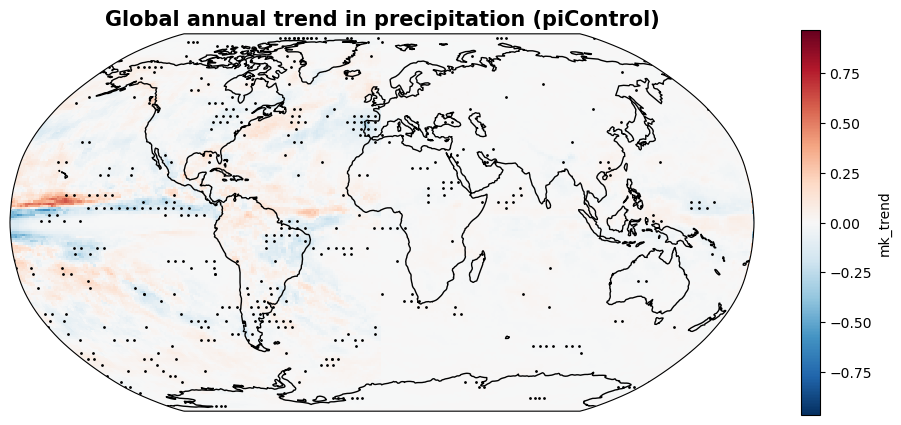

In [221]:
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111, projection=ccrs.Robinson())

pr_piControl_trend_NorESM_y.mk_trend.plot(facecolor="gray", transform=ccrs.PlateCarree(), ax=ax)
# coastlines
ax.coastlines()
ax.set_title('Global annual trend in precipitation (piControl)', fontweight='bold', fontsize=15)

dot_signif(pr_piControl_trend_NorESM_y, ax)

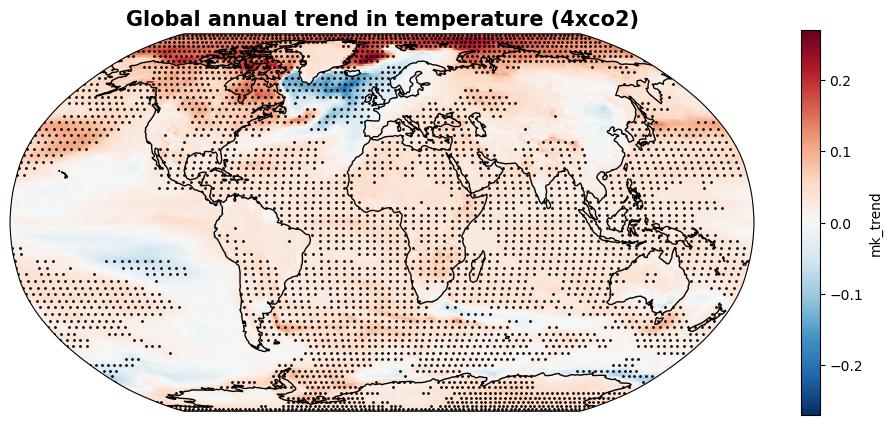

In [219]:
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111, projection=ccrs.Robinson())

ts_4xco2_trend_NorESM_y.mk_trend.plot(facecolor="gray", transform=ccrs.PlateCarree(), ax=ax)
# coastlines
ax.coastlines()
ax.set_title('Global annual trend in temperature (4xco2)', fontweight='bold', fontsize=15)

dot_signif(ts_4xco2_trend_NorESM_y, ax)

KeyboardInterrupt: 

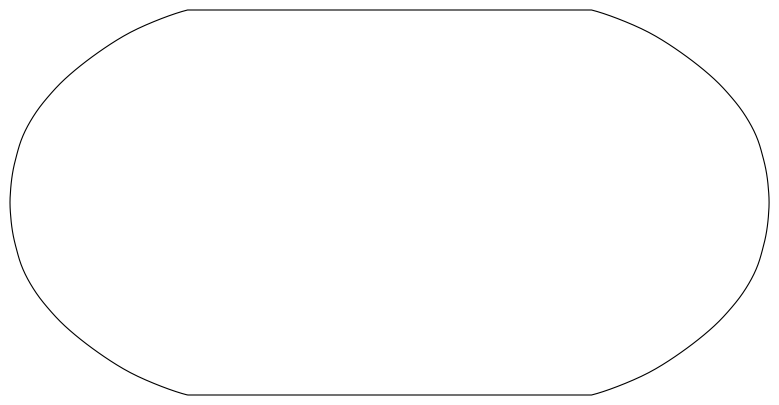

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111, projection=ccrs.Robinson())

ds_trend_4xco2['pr'].plot(facecolor="gray", transform=ccrs.PlateCarree(), ax=ax)
# coastlines
ax.coastlines()
ax.set_title('Global annual trend in precipitation (4xco2)', fontweight='bold', fontsize=15)

dot_signif(pr_4xco2_trend_NorESM_y, ax)


KeyboardInterrupt: 

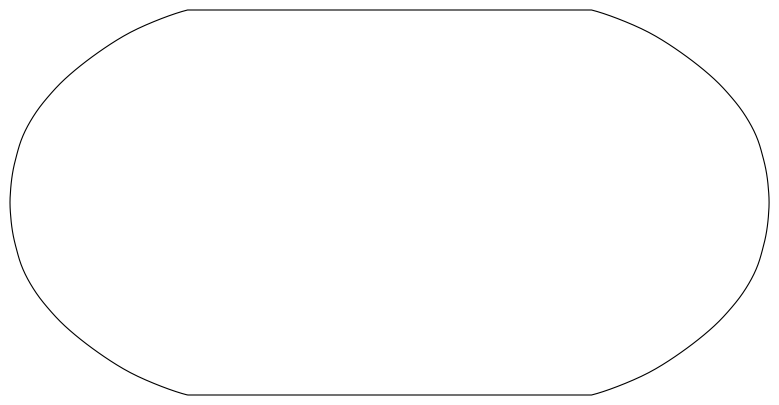

In [213]:
fig = plt.figure(figsize=(12, 5))
ax = plt.subplot(111, projection=ccrs.Robinson())

ds_trend_piControl['ts'].plot(facecolor="gray", transform=ccrs.PlateCarree(), ax=ax)
# coastlines
ax.coastlines()
ax.set_title('Global annual trend in temp (piControl)', fontweight='bold', fontsize=15)

dot_signif(ts_piControl_trend_NorESM_y, ax)


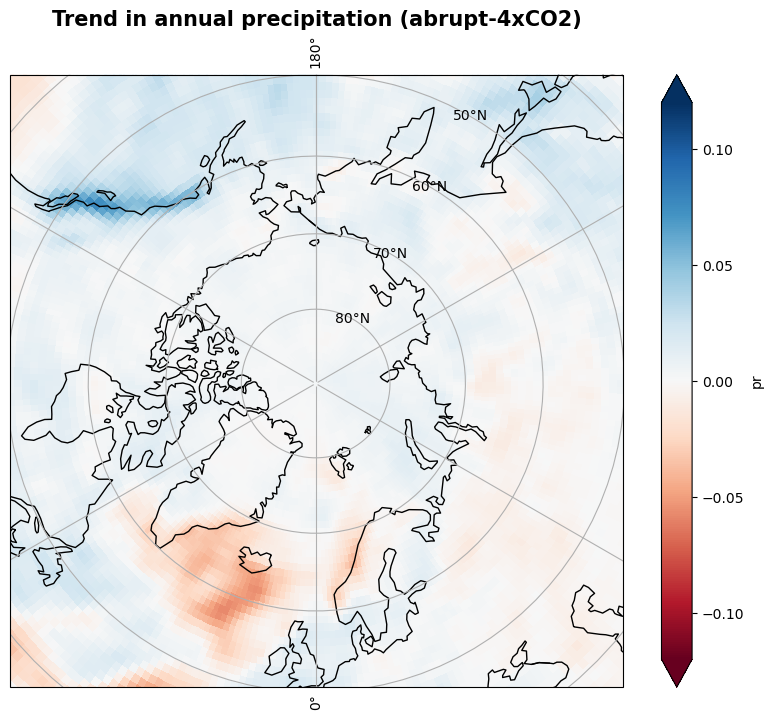

In [67]:
plot_map_trend(ds_trend_4xco2, 'pr', 'Trend in annual precipitation (abrupt-4xCO2)')  

KeyboardInterrupt: 

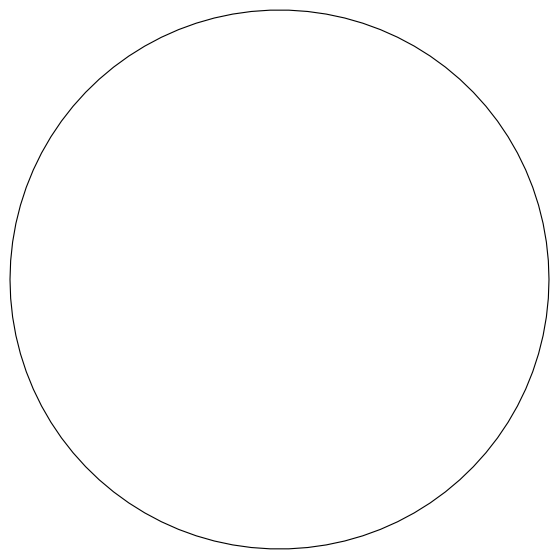

In [228]:
plot_map_trend(ds_trend_piControl, 'pr', 'Trend in annual precipitation (abrupt-4xCO2)')  

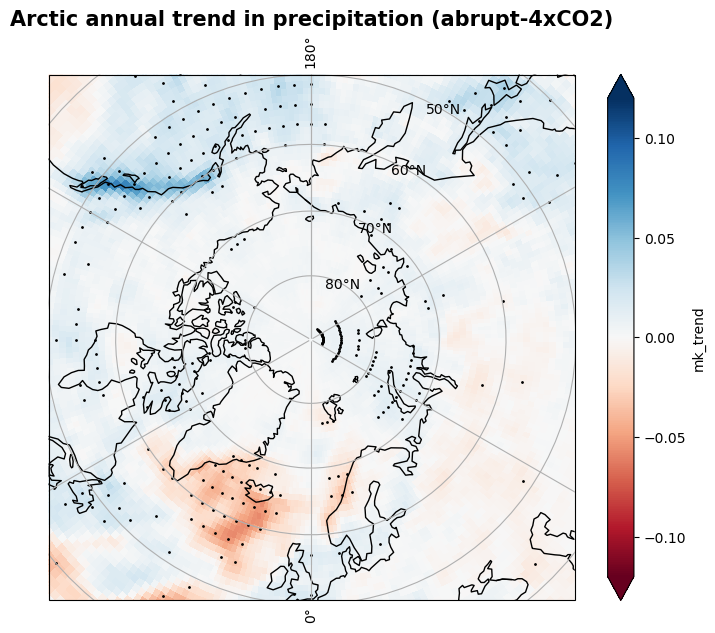

In [225]:
plot_map_trend(pr_4xco2_trend_NorESM_y, 'mk_trend', 'Arctic annual trend in precipitation (abrupt-4xCO2)')

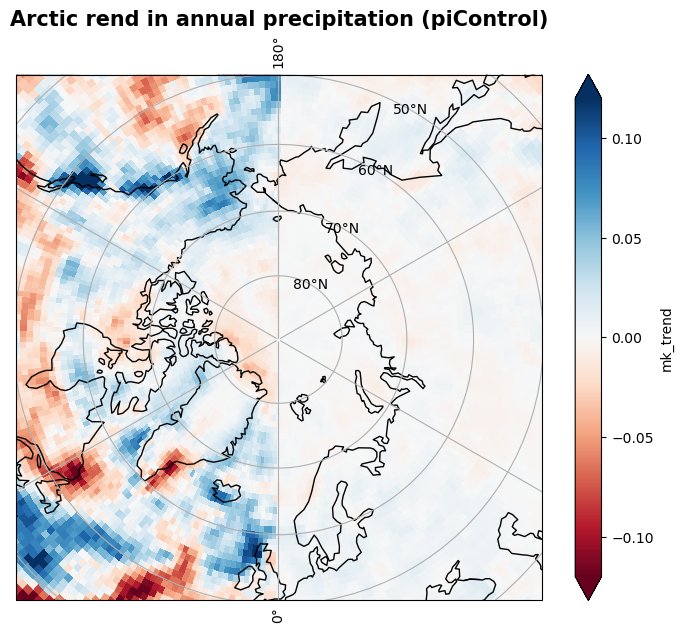

In [274]:
plot_map_trend(pr_piControl_trend_NorESM_y, 'mk_trend', 'Arctic rend in annual precipitation (piControl)')

### Making a correlation matrix

- find latidue above 80 degrees
- flatten variables (with array.reshape[-1,1])
- make a dataframe with each variabel in the columns
- plot the correlation matrix.

In [37]:
# new ds with lat>80 degrees

max_lat = 90
min_lat = 70
max_lon = 178
min_lon = 0

mask_lon = (ds_4xco2_NorESM_y.lon >= min_lon) & (ds_4xco2_NorESM_y.lon <= max_lon)
mask_lat = (ds_4xco2_NorESM_y.lat >= min_lat) & (ds_4xco2_NorESM_y.lat<= max_lat)

ds_arctic_4xco2 = ds_all.where(mask_lon & mask_lat, drop=True)
ds_arctic_4xco2

<xarray.Dataset>
Dimensions:  (time: 360, lat: 22, lon: 143, lev: 32)
Coordinates:
  * time     (time) object 0001-01-16 12:00:00 ... 0030-12-16 12:00:00
  * lat      (lat) float64 70.21 71.15 72.09 73.04 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 173.8 175.0 176.2 177.5
  * lev      (lev) float64 0.9926 0.9763 0.9575 ... 0.01436 0.007595 0.003643
Data variables: (12/16)
    pr       (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    ccn      (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    cdnc     (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 22, 48), meta=np.ndarray>
    co2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 22, 48), meta=np.ndarray>
    emibc    (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    emibvoc  (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    ...       ...
    emiso4   (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    emiss    (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    emivoc   (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    prc      (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>
    so2      (time, lev, lat, lon) float32 dask.array<chunksize=(120, 32, 22, 48), meta=np.ndarray>
    ts       (time, lat, lon) float32 dask.array<chunksize=(120, 22, 143), meta=np.ndarray>

In [38]:
#arrays = [ds[i].values.flatten() for i in variables] 

In [39]:
var_arrays = []
for var in var_list:
    var_arrays.append(np.array([ds_arctic_4xco2[var]]).reshape(-1,1))
    
    
#ar = np.array([ds_arctic_4xco2['pr']])
#ar.reshape(-1,1)
var_arrays[0]


array([[3.3488475e-05],
       [3.4001339e-05],
       [3.3211356e-05],
       ...,
       [5.4852994e-06],
       [5.4848915e-06],
       [5.4845164e-06]], dtype=float32)

In [40]:
data = {str(var_list[0]): var_arrays[0], str(var_list[1]): var_arrays[1]}  

In [41]:
#df_var = pd.DataFrame(data)


### Time series plots - Global and Arctic mean

In [285]:
def weighted_mean(ds):
    weights = np.cos(np.deg2rad(ds.lat))
    weights.name = "weights"
    air_weighted = ds.weighted(weights)
    weighted_mean = air_weighted.mean(("lon", "lat"))
    return weighted_mean


In [286]:
# Arctic 

max_lat = 90
min_lat = 70
max_lon = 135
min_lon = 45

mask_lon = (ds_4xco2_NorESM_y.lon >= min_lon) & (ds_4xco2_NorESM_y.lon <= max_lon)
mask_lat = (ds_4xco2_NorESM_y.lat >= min_lat) & (ds_4xco2_NorESM_y.lat<= max_lat)

ds_arctic_4xco2 = ds_4xco2_NorESM_y.where(mask_lon & mask_lat, drop=True)



In [287]:
max_lat = 90
min_lat = 70
max_lon = 135
min_lon = 45

mask_lon_pi = (ds_piControl_NorESM_y.lon >= min_lon) & (ds_piControl_NorESM_y.lon <= max_lon)
mask_lat_pi = (ds_piControl_NorESM_y.lat >= min_lat) & (ds_piControl_NorESM_y.lat<= max_lat)


ds_arctic_piControl = ds_piControl_NorESM_y.where(mask_lon & mask_lat, drop=True)

In [288]:
#ds_arctic_4xco2_y = annual(ds_arctic_4xco2)
#ds_arctic_4xco2_y = fix_units(ds_arctic_4xco2_y )

#ds_arctic_piControl_y = annual(ds_arctic_piControl)
#ds_arctic_piControl_y = fix_units(ds_arctic_piControl_y )

In [297]:
arctic_mean_4xco2 = weighted_mean(ds_arctic_4xco2_y)
global_mean_4xco2 = weighted_mean(ds_4xco2_NorESM_y)


arctic_mean_piControl = weighted_mean(ds_arctic_piControl_y)
global_mean_piControl = weighted_mean(ds_piControl_NorESM_y)

In [290]:
#arctic_mean_piControl['pr'] = arctic_mean_piControl['pr']/86400 # mm/year
#ds['pr'] = ds['pr'].assign_attrs(units='mm/year')
#arctic_mean_piControl['ts'] = arctic_mean_piControl['ts']+273.15 # C

In [291]:
arctic_mean_piControl.pr.values

array([0.97174661, 0.95752448, 0.98242509, 0.82032599, 0.90246789,
       0.8419102 , 0.95255198, 0.95392508, 0.92430295, 0.87430743,
       0.90744417, 0.88248109, 0.80051209, 0.85036798, 0.8727544 ,
       0.99736504, 0.90642091, 0.82059003, 0.92993078, 0.87374996,
       0.88464304, 0.93581442, 0.9376719 , 0.86609595, 0.86414101,
       0.89676408, 0.92858721, 0.89090022, 0.9313738 , 0.928004  ])

In [292]:
#air_weighted = ds_4xco2_NorESM_y.weighted(weights)
#air_weighted

In [293]:
#weighted_mean_4xco2 = air_weighted.mean(("lon", "lat"))
#weighted_mean_4xco2

In [294]:
def fancy(ax, fontsize):
    
    # thickning the axes spines
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
        
    # set the fontsize for all your ticks
    #fontsize = 15
    for tick in ax.xaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label1.set_fontsize(fontsize)
        
    # properties of the ticks
    ax.tick_params(direction='out', length=8, width=2, pad=10, bottom=True, top=False, left=True, right=False, color='k')
    
    # add a grid to the plot
    ax.grid(True, alpha=0.5)
    
    # mask top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

In [295]:
timepoints = []

for i in range(len(global_mean_4xco2['time'])):
    timepoints.append(i)

timepoints
timepoints2 = []
for i in range(len(global_mean_piControl['time'])):
    timepoints2.append(i)

/srv/conda/envs/notebook/lib/python3.9/site-packages/flox/aggregate_flox.py:105: RuntimeWarning: invalid value encountered in divide
  out /= nanlen(group_idx, array, size=size, axis=axis, fill_value=0)


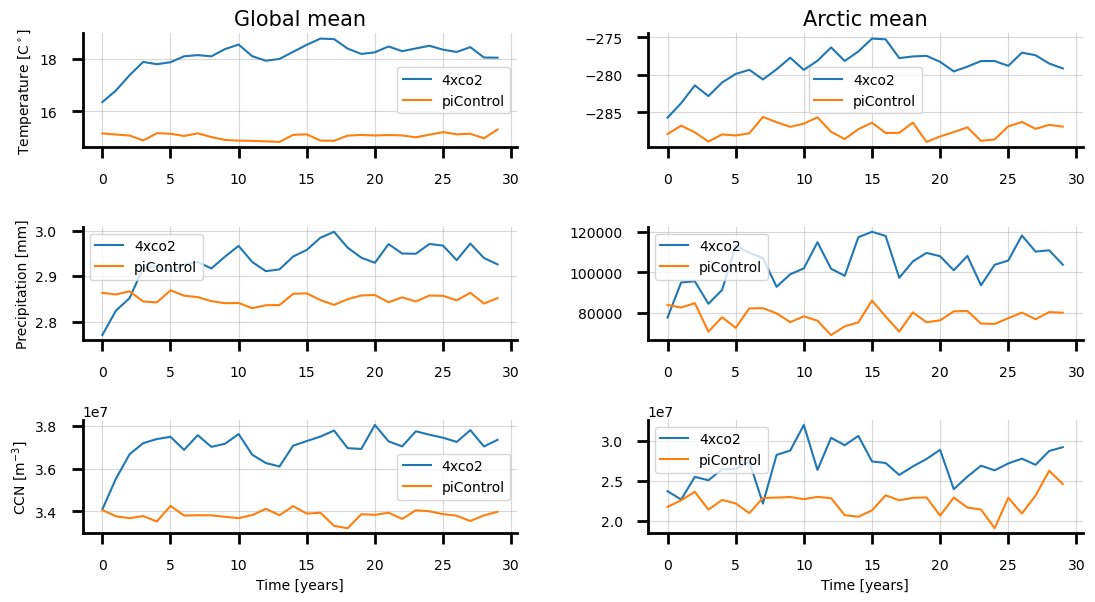

In [298]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 5))

gs = gridspec.GridSpec(ncols=2, nrows=3, hspace = 0.7, wspace = 0.3, top = 1,
                       bottom = 0, left = 0, right = 1)

# create an ax with gs
ax = fig.add_subplot(gs[0, 0])
ax.plot(timepoints, global_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ts'], label='piControl')
ax.set_title('Global mean', size=15)
ax.set_ylabel('Temperature [C$^\circ$]')
ax.legend()
fancy(ax, 10)
#fig.suptitle('h')
#hide_ticks(ax)
#ax.text(0, 0, 'gs[0:4, 0:2]', fontsize=17, color='red', transform=ax.transAxes, 
        #horizontalalignment='center', verticalalignment='center')

ax = fig.add_subplot(gs[1, 0])
#hide_ticks(ax)
ax.plot(timepoints, global_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['pr'], label='piControl')
#ax.set_title('Precipitation')
ax.set_ylabel('Precipitation [mm]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 0])
#hide_ticks(ax)
ax.plot(timepoints, global_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, global_mean_piControl['ccn'], label='piControl')
#ax.set_title('CCN')
ax.set_xlabel('Time [years]')
ax.set_ylabel('CCN [m$^{-3}$]')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[0, 1])
#hide_ticks(ax)
ax.plot(timepoints, arctic_mean_4xco2['ts'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ts'], label='piControl')
ax.set_title('Arctic mean', size=15)
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[1, 1])
#hide_ticks(ax)
ax.plot(timepoints, arctic_mean_4xco2['pr'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['pr'], label='piControl')
#ax.set_title('Precipitation')
ax.legend()
fancy(ax, 10)

ax = fig.add_subplot(gs[2, 1])
#hide_ticks(ax)
ax.plot(timepoints, arctic_mean_4xco2['ccn'], label='4xco2')
ax.plot(timepoints, arctic_mean_piControl['ccn'], label='piControl')
#ax.set_title('CCN')
ax.set_xlabel('Time [years]')
ax.legend()
fancy(ax, 10)


